<a href="https://colab.research.google.com/github/ramansbach/astrophysics_notebooks/blob/main/WeekOne_L02_Orbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kepler's First Law

Planets orbit the Sun in an ellipse with the Sun at one of the foci* of the ellipse.

The sum of distances from each focus to any point on the ellipse is a constant.

$$r_1 + r_2 = 2a$$

$$r = \frac{a(1-\epsilon^2)}{1+\epsilon \cos \theta} = \frac{L^2/\mu^2}{GM\left(1+\epsilon \cos \theta \right)}$$

$$ \frac{L}{\mu} = \sqrt{GMa(1-\epsilon^2)}$$

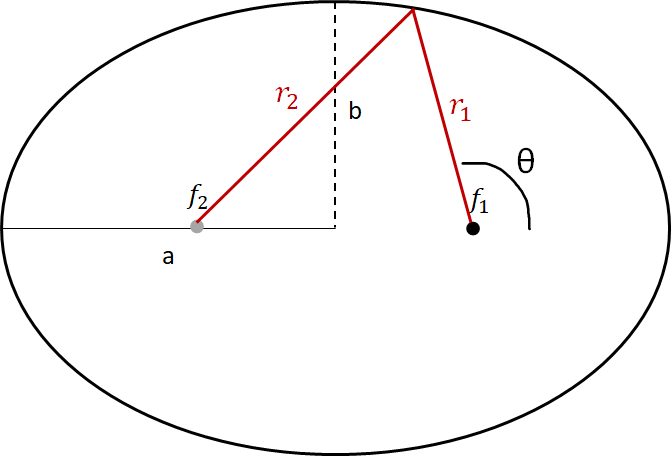

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Keplers_First_Law_r(M,a,e,theta):
  """
  Given the mass of a star, the angle(s) of a planet's orbit, its semimajor axis &
  eccentricity, compute the distance(s) of the planet from the focus of the orbit

  ----------
  Parameters
  ----------

  M: float
    mass of star
  a: float
    length of semi-major axis
  e: float
    eccentricity of orbity
  theta: angle
    angle of planet from x-axis

  Returns

  r: float
    distance
  """
  G = 6.673e-11
  LoM = np.sqrt(G*M*a*(1 - e**2))
  r = (LoM**2) / (G*M*(1 + e*np.cos(theta)))

  return r

In [ ]:
np.arange(0,2*np.pi,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

Text(0, 0.5, 'distance of earth from sun (kg)')

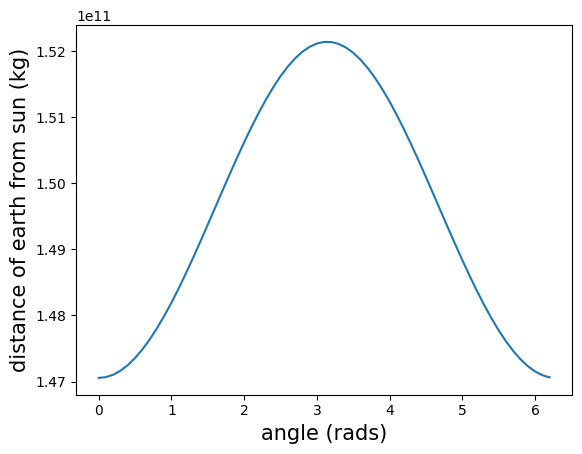

In [ ]:
thetas = np.arange(0,2*np.pi,0.1)
M = 1.9891e30 #mass of the Sun, in kg
a = 1.4959787066e11 #distance from earth to sun
e = 0.017 #ellipticity of Earth's orbit
rs = Keplers_First_Law_r(M,a,e,thetas)
plt.plot(thetas,rs)
plt.xlabel('angle (rads)',fontsize=15)
plt.ylabel('distance of earth from sun (kg)',fontsize=15)

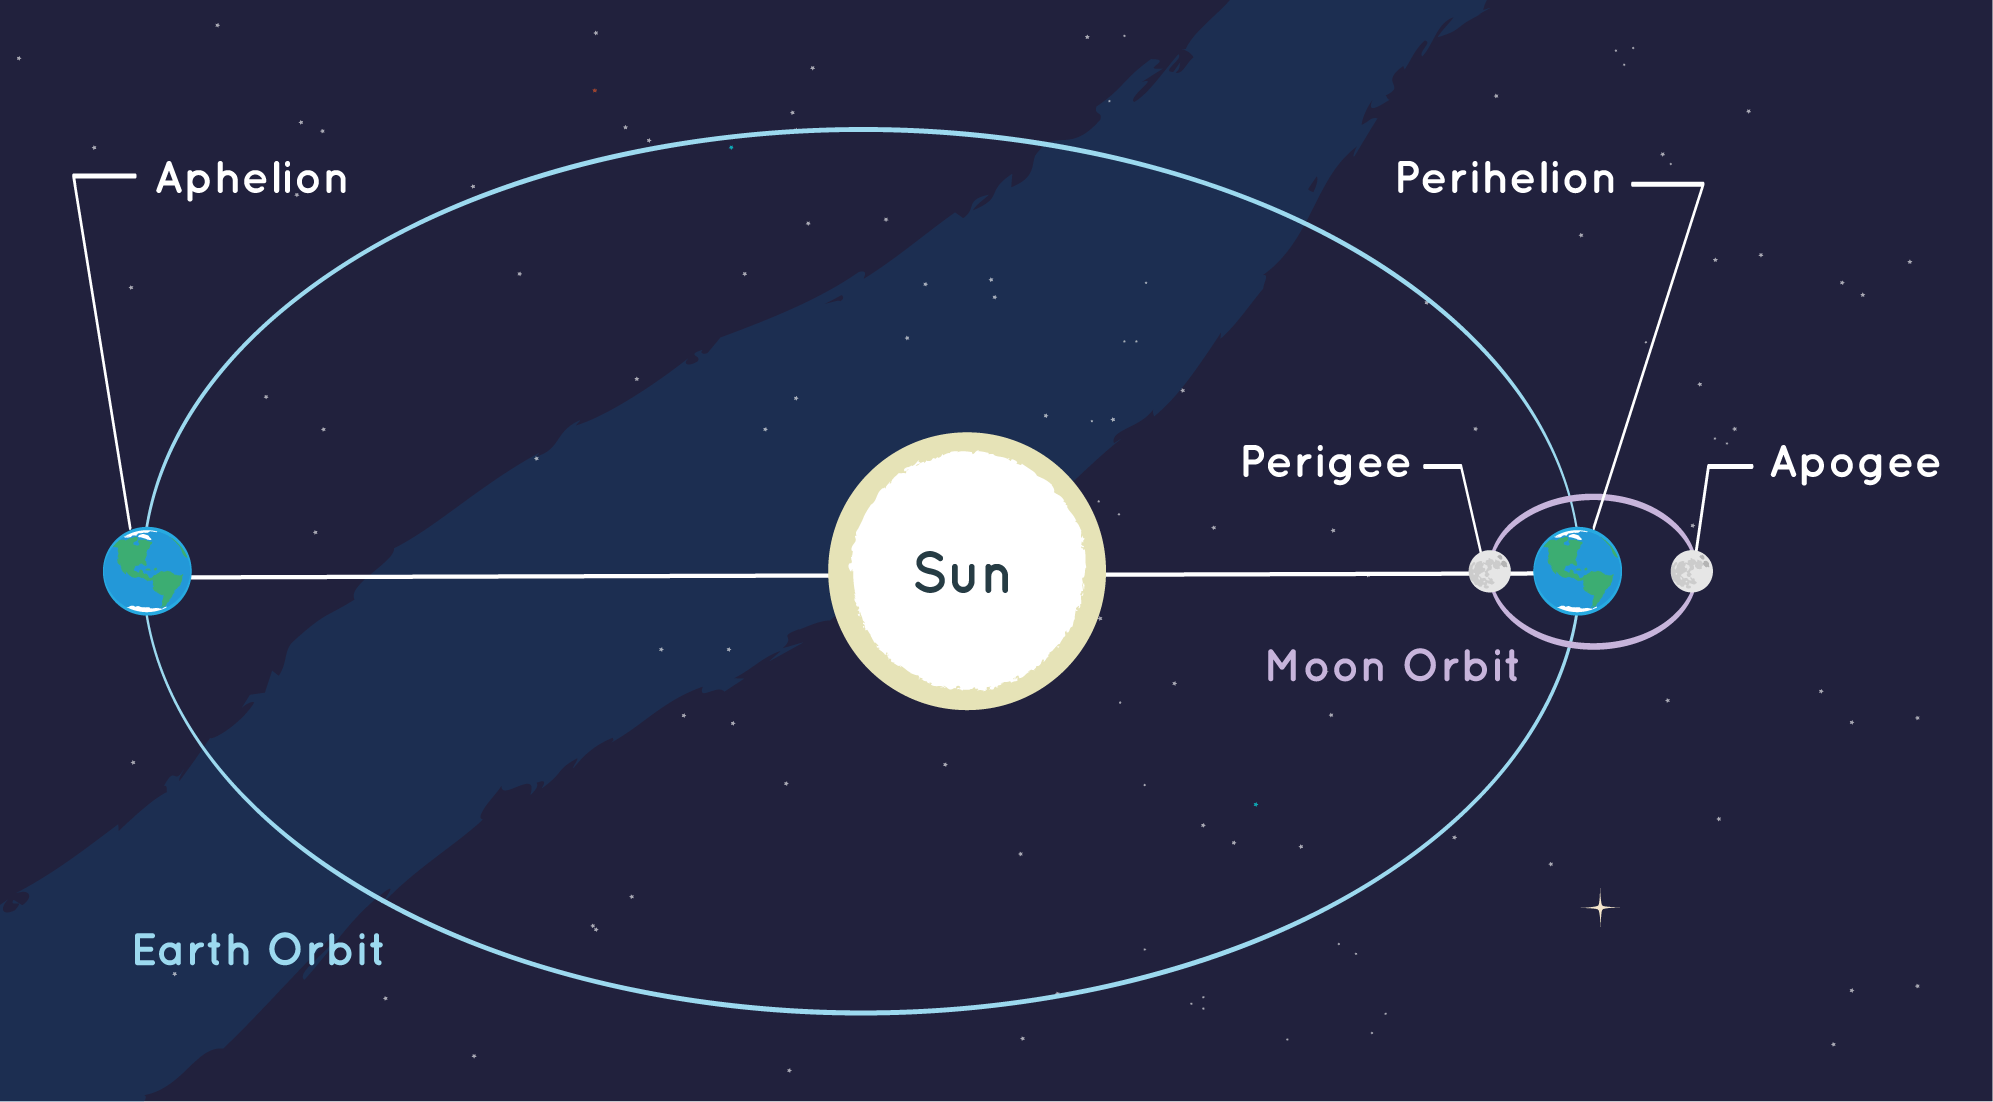

## Kepler's Second Law

If we do some geometry and calculus, we can derive the exact numerical form of Kepler's second law, relating the change in *area* swept out to the change in *angle*.  It turns out that from pure geometric concerns, the change in area is related to the change in angle through the distance from the focus:

$$
\frac{dA}{dt} = \frac{1}{2}r^2 \frac{d\theta}{dt}
$$

If we then transform the right hand side by rewriting it in terms of orbital velocity, it turns out we can relate the change in $\theta$ to the angular momentum as follows:

$$
\frac{dA}{dt} = \frac{1}{2} \frac{L}{\mu},
$$

where $\frac{L}{\mu}$ is once again the angular momentum per unit mass of the system (which in the case of a planet orbiting a star is basically the mass of the star.).  Because angular momentum is conserved, we can see that the rate of change of area is a constant, so we get the conceptual version of Kepler's Second Law.

Above, we used the angle to compute the distance of the planet from its star. Now we can use these two expressions to compute the change in angle over some small amount of time $dt$,

$$
 \frac{1}{2}r^2 \frac{d\theta}{dt} =  \frac{1}{2} \frac{L}{\mu}\
$$

$$
\implies d\theta = \frac{1}{r^2}\frac{L}{\mu} dt
$$
We'll see why we'd want to do this a little later.  For now let's just write a function to do it.

In [ ]:
def Keplers_Second_Law_dtheta(LoM, r, dt):
  dtheta = (1 / r**2) * LoM
  return dtheta

## Kepler's Third Law

Kepler's Third Law states that the square of the orbital period is proportional to the cube of the semi-major axis:
$$ T^2 = \frac{4\pi^2}{GM}a^3$$

Turning this into a simple function, we return the period given the other information:

In [ ]:
def Keplers_Third_Law_P(M,a):
    G = 6.673e-11
    P2 = ((4*np.pi**2)/(G * M)) * a**3
    P = np.sqrt(P2)
    return P

In [ ]:
solarSystemAxes = 1.4959787066e11*np.array([0.3871,0.7233,1.000,1.5273,5.2028,
                                            9.5388,19.1914,30.0611,39.5294])

periods = []
Msun = 1.9891e30
for i in range(len(solarSystemAxes)):
  p = Keplers_Third_Law_P(Msun,
                          solarSystemAxes[i])
  periods.append(p)

In [ ]:
Keplers_Third_Law_P(Msun,1.4959787066e11*9.54) / (3.154e7)

29.48084912628235

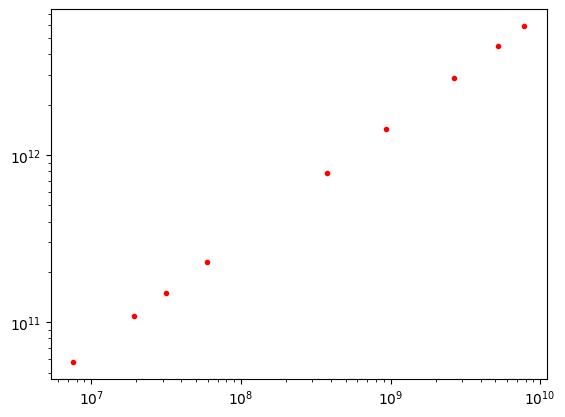

In [ ]:
plt.loglog(periods,solarSystemAxes,'r.')

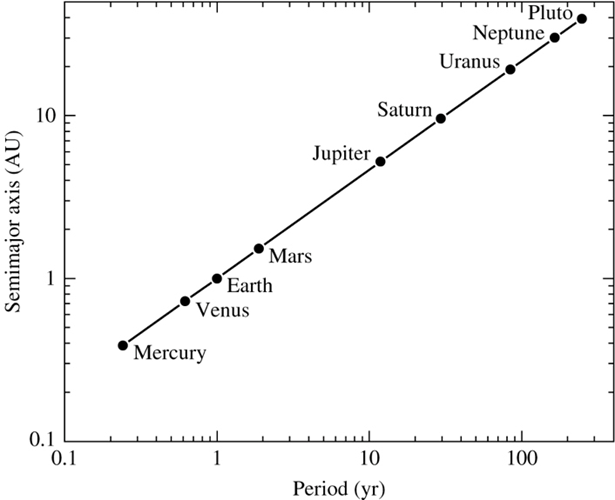


# Orbit.cpp
This is a Python port of Carroll & Ostlie's simple Orbit.cpp code.  Orbit computes the orbit of a small mass about a much larger mass.  Details of the code are described in <i>An Introduction to Modern Astrophysics</i>, Bradley W. Carroll and Dale A. Ostlie, Addison Wesley, copyright 2007.  Modifications for Google Colab written by R.A. Mansbach, for use with the Concordia Astrophysics course in 2024.

In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#define needed constants
G = 6.673e-11
AU = 1.4959787066e11
M_Sun = 1.9891e30
pi = 3.14159265358979323846264338327950
two_pi = 2*pi
yr = 3.15581450e7
radians_to_degrees = 180/pi
eps_dp = 1e-15

Here we do some setup retrieving data from the user.  For earth, the relevant values are 1 solar mass (obviously), semimajor axis = 1 AU (of course), and the orbital eccentricity is 0.017

In [ ]:
# @title
Mstrsun = float(input("Enter the mass of the parent star (in solar masses): "))

Enter the mass of the parent star (in solar masses): 1


In [ ]:
Mstrsun

1.0

In [ ]:
aAU = float(input("Enter the semimajor axis of the orbit (in AU): "))

Enter the semimajor axis of the orbit (in AU): 1


In [ ]:
e = float(input("Enter the orbital eccentricity: "))

Enter the orbital eccentricity: 0.017


In [ ]:
#Convert entered values to conventional SI units
Mstar = Mstrsun*M_Sun
a = aAU*AU

In [ ]:
#Calculate the orbital period in seconds using Kepler's Third Law (Eq. 2.37)
P = np.sqrt(4*pi*pi*a*a*a/(G*Mstar))

In [ ]:
#Convert the orbital period to years (and print the result)
print("The period of this orbit is {} years".format(P/yr))

The period of this orbit is 0.9999255091776377 years


Please enter the number of time steps to be calculated and the frequency with which you want time steps printed. Note that taking too large a time step during the calculation will produce inaccruate results.

In [ ]:
#Enter the number of time steps and the time interval to be printed
n = int(input("Enter the number of time steps desired for the calculation: "))
n += 1 #increment to inclute t=0 (initial) point

Enter the number of time steps desired for the calculation: 1000


In [ ]:
kmax = int(input("How often do you want the time steps to be saved? "))

How often do you want the time steps to be saved? 1


In [ ]:
#initalize matrix to track data because we aren't going to print to output file
datamat = np.zeros((int(n/kmax),5))
#initialize print counter, angle, elapsed time & time step
k = 1 #printer counter
theta = 0 #angle from direction to perihelion (radians)
t = 0 #elapsed time (s)
dt = P/(n-1) #time step (s)
delta = 2*eps_dp #allowable error at end of period

In [ ]:
datamat.shape

(1001, 5)

In [ ]:
dt

31555.79420782672

In [ ]:
#start main time (step) loop
i = 0
while True:
  # Calculate the distance from the principal focus using Eq. (2.3); Kepler's first law
  r = a*(1-e*e)/(1+e*np.cos(theta))

  #if time to print, convert to cartesian
  if k ==1:
      datamat[i] = np.array([t/yr,r/AU,theta*radians_to_degrees,
                             r*np.cos(theta)/AU,
                             r*np.sin(theta)/AU])
  #prepare for the next time step: update the elapsed time
  t = t + dt

  #calculate the angular momentum per unit mass, L/m (Eq. 2.30)
  LoM = np.sqrt(G*Mstar*a*(1-e*e))

  #Compute the next value for theta using the fixed time step by combining
  #Eq (2.31) with Eq. (2.32), which is Kepler's Second Law
  dtheta = LoM/(r*r)*dt
  theta += dtheta

  #reset print counter if necessary
  k+=1
  if (k > kmax or (theta-two_pi)/two_pi > delta or (t-P)/P > delta):
    k = 1
  i += 1
  if (theta-two_pi >= dtheta /2 ) and (t-P >= dt/2):
    break

In [ ]:
#turn data into a pandas dataframe & display
Data = pd.DataFrame(datamat,columns=['t (yr)','r (AU)','theta (deg)', 'x (AU)', 'y (AU)'])
Data

,t (yr),r (AU),theta (deg),x (AU),y (AU)
0,0.000000,0.983000,0.000000,0.983000,0.000000e+00
1,0.001000,0.983000,0.372506,0.982980,6.390880e-03
2,0.002000,0.983001,0.745011,0.982918,1.278150e-02
3,0.003000,0.983003,1.117515,0.982816,1.917159e-02
4,0.004000,0.983006,1.490018,0.982673,2.556089e-02
...,...,...,...,...,...
996,0.995926,0.983006,358.509987,0.982673,-2.556081e-02
997,0.996926,0.983003,358.882488,0.982816,-1.917154e-02
998,0.997926,0.983001,359.254991,0.982918,-1.278147e-02
999,0.998926,0.983000,359.627495,0.982980,-6.390864e-03


The earth's orbit, as indicated by the very small eccentricity, is nearly circular, meaning that the distance between the Earth and the sun will not change much.  Let's see this, and then we can plot the actual orbit, quite simply.

Text(0, 0.5, 'distance between earth & sun')

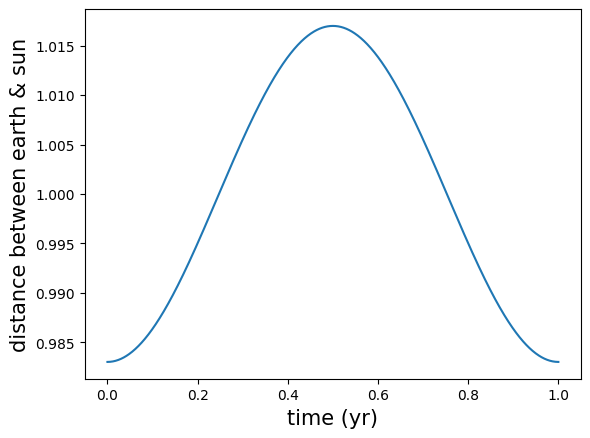

In [ ]:
plt.plot(datamat[:,0],datamat[:,1])
plt.xlabel('time (yr)',fontsize=15)
plt.ylabel('distance between earth & sun',fontsize=15)

In [ ]:
datamat[1,:]

array([0.00099993, 0.98300035, 0.37250551, 0.98297957, 0.00639088])

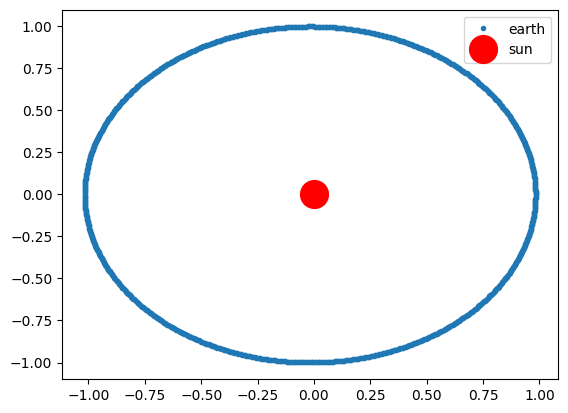

In [ ]:
plt.plot(datamat[:,3],datamat[:,4],'.')
plt.plot([0],[0],'o',color='r',markersize=20)
plt.legend(['earth','sun'])

In what follows, we reformulate slightly so that the code can be invoked as a function, rather than having to rerun it to get new data each time.

In [ ]:
import pdb
def orbit(Mstrsun,aAU,e,n):
  """
  orbit function which computes a simple binary orbit, assuming one mass is much
  larger than the other

  ----------
  Parameters
  ----------
  Mstrsun : float
    mass of parent star (in solar masses)
  aAU : float
    semimajor axis of orbit (in AU)
  e : float
    eccentricity of orbit
  n : int
    # of timesteps over which to compute the orbit

  -------
  Returns
  -------
  datamat : numpy array, n x 5

  """
  Mstar = Mstrsun*M_Sun
  a = aAU*AU
  P = np.sqrt(4*pi*pi*a*a*a/(G*Mstar))
  datamat = np.zeros((n,5))
  k = 1
  theta = 0
  t = 0
  dt = P/(n-1)
  delta = 2*eps_dp
  #start main time (step) loop
  i = 0
  while True:
    # Calculate the distance from the principal focus using Eq. (2.3); Kepler's first law
    r = a*(1-e*e)/(1+e*np.cos(theta))
    #pdb.set_trace()
    datamat[i,:] = np.array([t/yr,r/AU,theta*radians_to_degrees,
                          r*np.cos(theta)/AU,
                          r*np.sin(theta)/AU])
    #print(datamat[i,:])
    #prepare for the next time step: update the elapsed time
    t += dt

    #calculate the angular momentum per unit mass, L/m (Eq. 2.30)
    LoM = np.sqrt(G*Mstar*a*(1-e*e))

    #Compute the next value for theta using the fixed time step by combining
    #Eq (2.31) with Eq. (2.32), which is Kepler's Second Law
    dtheta = LoM/(r*r)*dt
    theta += dtheta

    i += 1
    #print(i)

    #pdb.set_trace()
    if (theta-two_pi >= dtheta /2 ) and (t-P >= dt/2):
      #pdb.set_trace()
      break
  return datamat

In [ ]:
d0 = orbit(1,1,0,1000)
d1 = orbit(1,1,0.4,1000)
d2 = orbit(1,1,0.9,1000)

In [ ]:
pd.DataFrame(d1,columns=['t (yr)','r (AU)','theta (deg)', 'x (AU)', 'y (AU)'])

,t (yr),r (AU),theta (deg),x (AU),y (AU)
0,0.000000,0.600000,0.000000,0.600000,0.000000
1,0.001001,0.600022,0.917433,0.599945,0.009607
2,0.002002,0.600088,1.834798,0.599780,0.019213
3,0.003003,0.600198,2.751962,0.599506,0.028817
4,0.004004,0.600352,3.668790,0.599121,0.038416
...,...,...,...,...,...
995,0.995922,0.600351,356.333537,0.599122,-0.038391
996,0.996923,0.600197,357.249897,0.599506,-0.028797
997,0.997924,0.600088,358.166726,0.599781,-0.019198
998,0.998925,0.600022,359.083890,0.599945,-0.009593


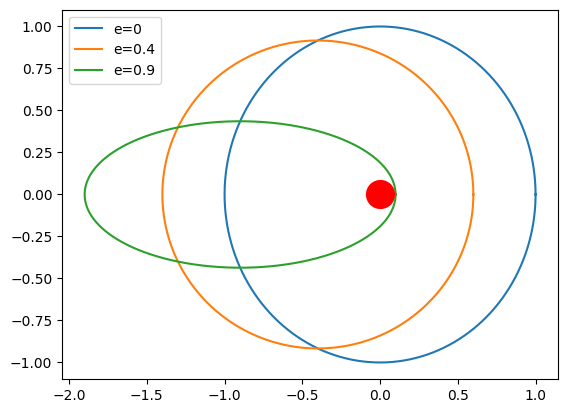

In [ ]:
plt.plot(d0[:,3],d0[:,4])
plt.plot(d1[:,3],d1[:,4])
plt.plot(d2[:,3],d2[:,4])
plt.plot([0],[0],'ro',markersize=20)
plt.legend(['e=0','e=0.4','e=0.9'])